Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Number of Observations in adult dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


no. of ? in native.country: 0
no. of ? in occupation: 0
no. of ? in workclass: 0


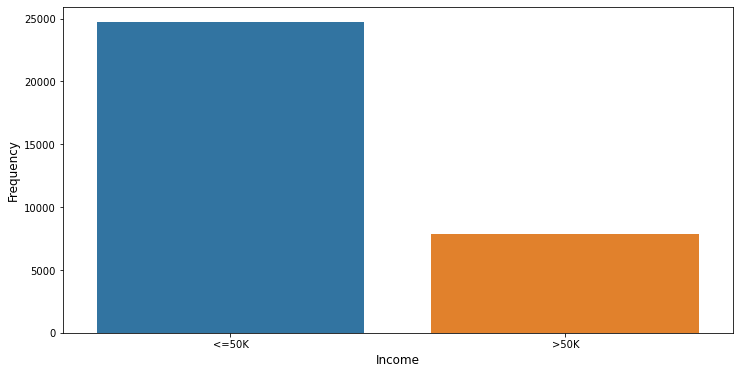

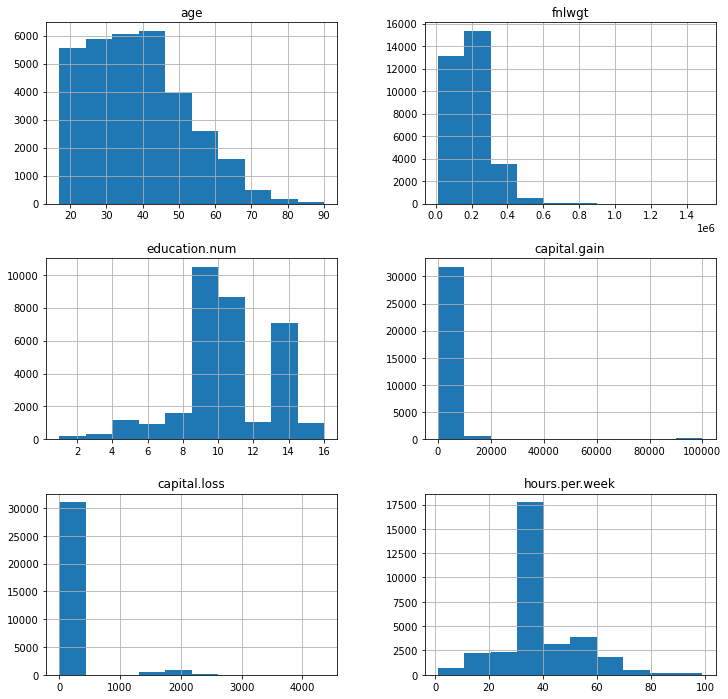

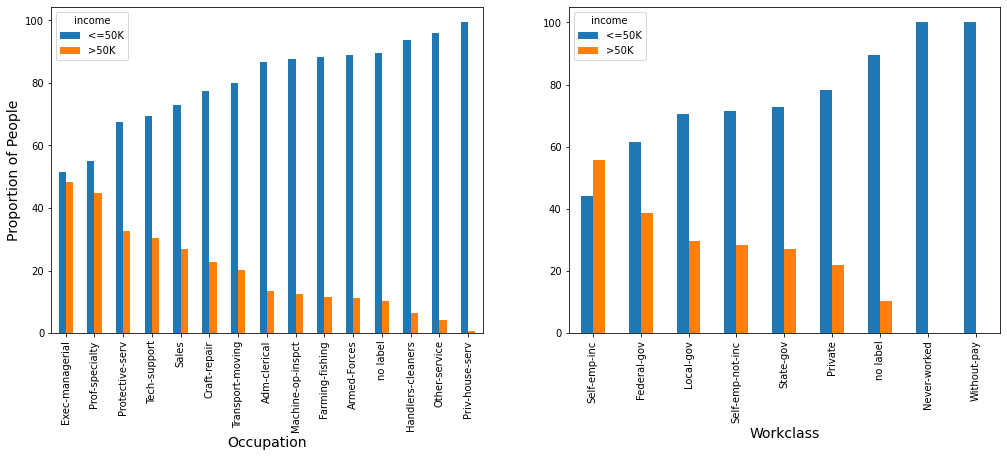

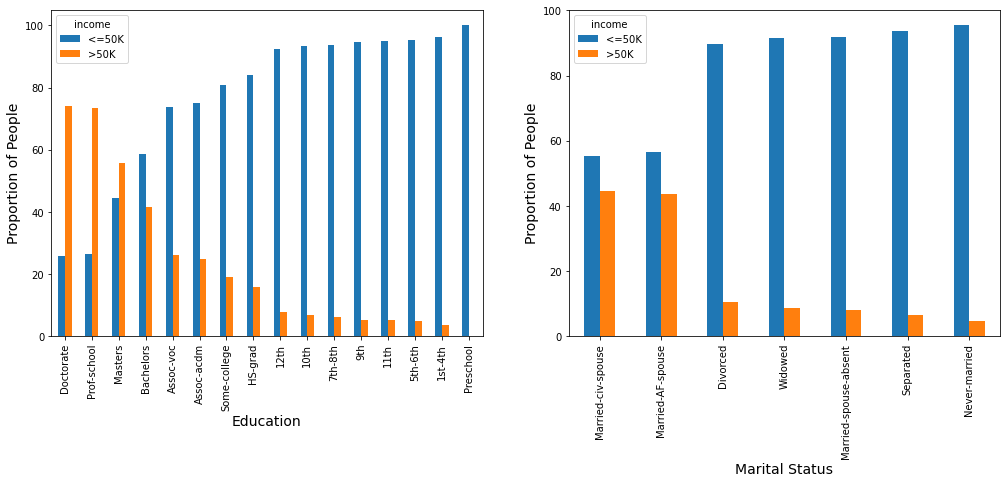

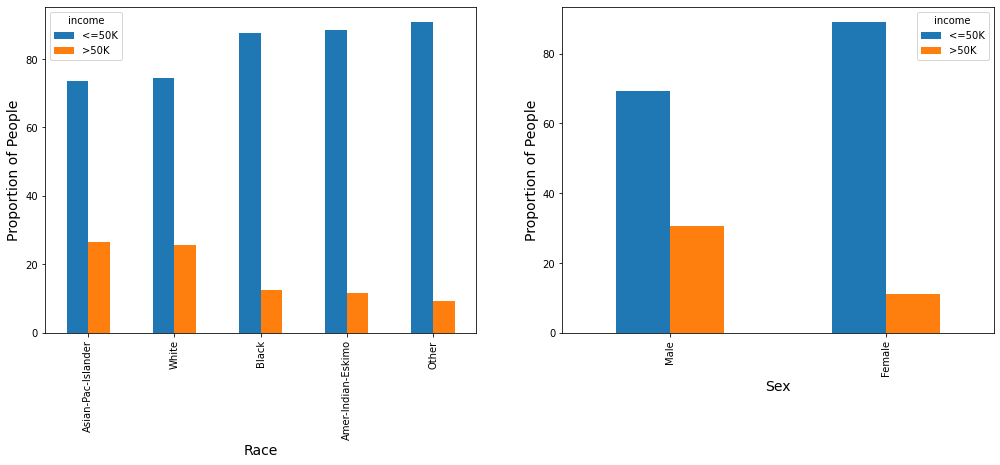

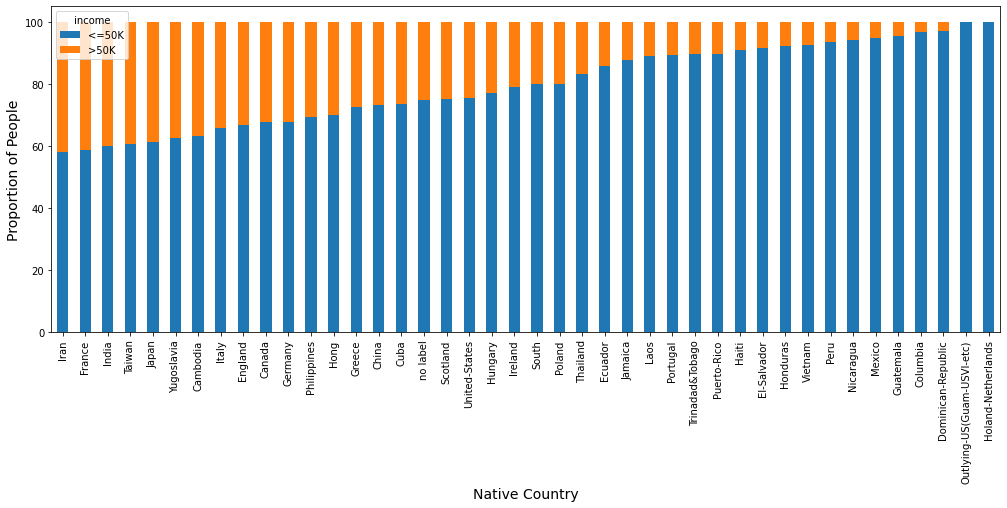

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns



adult_df = pd.read_csv(r'adult.csv')
print("Number of Observations in adult dataset:", adult_df.shape)


display(adult_df.head())


edit_cols = ['native.country','occupation','workclass']
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'no label'
for col in edit_cols:
    print(f"no. of ? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")    
    
    
cat_col = adult_df.dtypes[adult_df.dtypes == 'object']
num_col = adult_df.dtypes[adult_df.dtypes != 'object']
# for col in list(cat_col.index):
#     print(f"--------------------{col.title()}-------------------------")
#     total= adult_df[col].value_counts()
#     percent = adult_df[col].value_counts() / adult_df.shape[0]
#     df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
#     print(df)
#     print('\n')
      
    
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);  

adult_df[list(num_col.index)].hist(figsize = (12,12));



table_occu = pd.crosstab(adult_df['occupation'], adult_df['income'])
table_workclass = pd.crosstab(adult_df['workclass'], adult_df['income'])
table_edu = pd.crosstab(adult_df['education'], adult_df['income'])
table_marital = pd.crosstab(adult_df['marital.status'], adult_df['income'])
table_race = pd.crosstab(adult_df['race'], adult_df['income'])
table_sex = pd.crosstab(adult_df['sex'], adult_df['income'])
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])

fig = plt.figure(figsize = (17,6))


ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);



fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


In [15]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
display(pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(3))

class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])
num_df = pipeline.fit_transform(adult_df)
num_df.shape

cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape


cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

# 42 to make the results stable everytime
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.15,random_state = 42)

clf_logreg = LogisticRegression()
clf_svc = SVC()
classifiers = ['LogisticRegression', 'SVC']

models = {clf_logreg:'LogisticRegression',
          clf_svc: 'SVC',

          }

def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)   


,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,1.000000,0.0,1.0,0.397959,0.043987
1,0.890411,0.0,1.0,0.173469,0.081896
2,0.671233,0.0,1.0,0.397959,0.118021


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 84.7492%
Null Accuracy: 23.0297%
Confusion Matrix
[[ 628  497]
 [ 248 3512]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.7492%
Recall Score: 93.4043%
Precision Score: 87.6029%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1125
           1       0.88      0.93      0.90      3760

    accuracy                           0.85      4885
   macro avg       0.80      0.75      0.77      4885
weighted avg       0.84      0.85      0.84      4885

--------------------------------------------SVC---------------------------------------------------
Accuracy Score for SVC: 84.1760%
Null Accuracy: 23.0297%
Confusion Matrix
[[ 591  534]
 [ 239 35